# Chapter10 - Exercise

In [154]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

from itertools import combinations

%matplotlib inline
plt.style.use('seaborn-white')

# 3
## (a)

In [100]:
df = pd.DataFrame({'X1':[1,1,0,5,6,4], 'X2':[4,3,4,1,2,0]})

In [101]:
df

,X1,X2
0,1,4
1,1,3
2,0,4
3,5,1
4,6,2
5,4,0


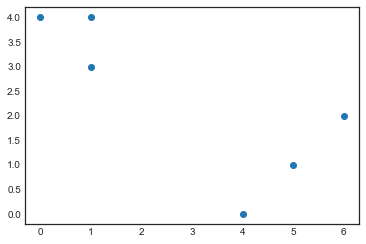

In [102]:
plt.scatter(df['X1'], df['X2']);

## (b)

In [103]:
np.random.seed(1)
label = np.random.choice(2,6,replace=True)

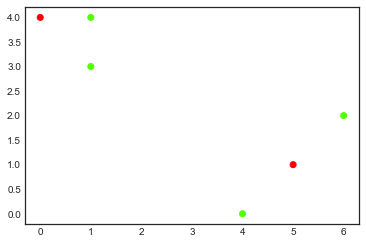

In [104]:
plt.scatter(df['X1'], df['X2'], c=label, cmap=plt.cm.prism);

## (c)

In [105]:
label

array([1, 1, 0, 0, 1, 1])

In [107]:
df['label'] = label

In [108]:
# centroid for label = 1
centroid_1 = np.array(df[df['label'] == 1].mean()[:2])

# centroid for label = 0
centroid_0 = np.array(df[df['label'] == 0].mean()[:2])

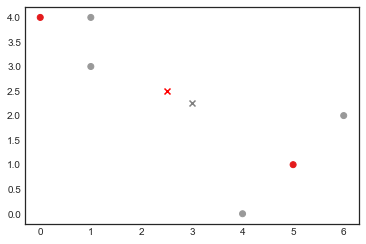

In [109]:
plt.scatter(df['X1'], df['X2'], c=df['label'], cmap=plt.cm.Set1)
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x')
plt.scatter(centroid_1[0], centroid_1[1], color='grey', marker='x');

## (d)

In [110]:
# Construct a function which will return assignment to the centroid to which it is closest.
def calc_dist(x1,c0, c1):
    if type(x1) != np.ndarray:
        x1 = np.array(x1)
    
    d0 = LA.norm(x1-c0)
    d1 = LA.norm(x1-c1)
    
    if d0 >= d1:
        return 1
    else:
        return 0

In [111]:
df['label'] = df.apply(lambda x: calc_dist([x[0],x[1]], centroid_0, centroid_1), axis=1)

In [112]:
df

,X1,X2,label
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,1
5,4,0,1


In [113]:
# centroid for label = 1
centroid_1 = np.array(df[df['label'] == 1].mean()[:2])

# centroid for label = 0
centroid_0 = np.array(df[df['label'] == 0].mean()[:2])

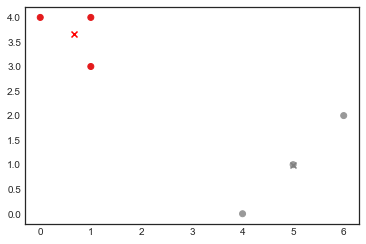

In [114]:
plt.scatter(df['X1'], df['X2'], c=df['label'], cmap=plt.cm.Set1 )
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x')
plt.scatter(centroid_1[0], centroid_1[1], color='grey', marker='x');

# (e)

In [115]:
df['label'] = df.apply(lambda x: calc_dist([x[0],x[1]], centroid_0, centroid_1), axis=1)

In [116]:
df

,X1,X2,label
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,1
5,4,0,1


We already got the answer.

## (f)
I already have done this.

# 7

In [133]:
df = pd.read_csv("../Data/USArrests.csv", index_col='Unnamed: 0')
df = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [164]:
dist_list = []
corr_list = []
for (i,j) in combinations(range(50),2):
    dist = (LA.norm(df.iloc[i] - df.iloc[j]))**2
    corr = 1 - np.corrcoef(df.iloc[i], df.iloc[j])[0,1]
    dist_list.append(dist)
    corr_list.append(corr)

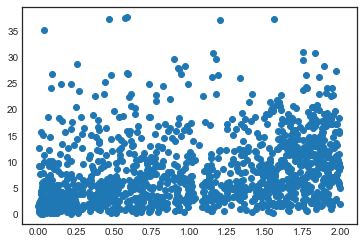

In [165]:
plt.scatter(corr_list, dist_list)

In [173]:
df2 = pd.DataFrame(np.array(corr_list) / np.array(dist_list))

In [175]:
df2.describe()

,0
count,1225.000000
mean,0.229509
std,0.337532
min,0.000084
25%,0.067752
50%,0.131265
75%,0.257338
max,4.789933


In [178]:
df3 = pd.DataFrame({"dist":dist_list, "corr":corr_list})

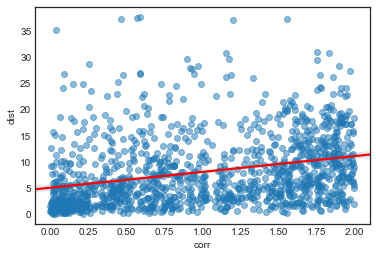

In [184]:
sns.regplot('corr', 'dist', df3, scatter_kws= {"alpha":0.5}, line_kws={"Color":"red"});

# 8

## (a)

In [185]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [187]:
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [189]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

## (b)

In [194]:
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.index)
df_pca.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [198]:
explained_variance = np.array([np.var(df_pca['PC1']), np.var(df_pca['PC2']), np.var(df_pca['PC3']), np.var(df_pca['PC4'])]) / 4

In [199]:
explained_variance

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

# 9
## (a)

In [203]:
df = pd.read_csv("../Data/USArrests.csv", index_col='Unnamed: 0')

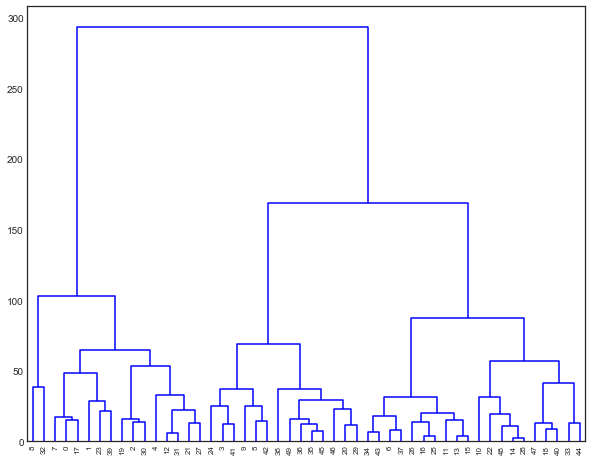

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cluster = hierarchy.dendrogram(hierarchy.complete(df), ax=ax, color_threshold=0)

ax1.set_title("Complete Linkage");

## (b)

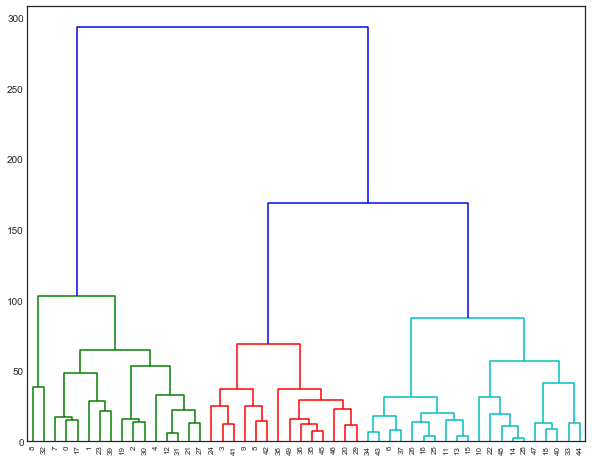

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cluster = hierarchy.dendrogram(hierarchy.complete(df), ax=ax, color_threshold=120)

ax1.set_title("Complete Linkage");

## (c)

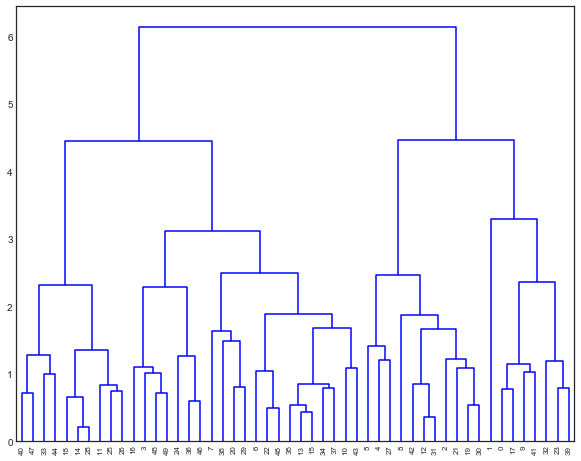

In [220]:
df_scale = scale(df)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cluster = hierarchy.dendrogram(hierarchy.complete(df_scale), ax=ax, color_threshold=0)

ax1.set_title("Complete Linkage");

In [221]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


I think it would be better to standardize variables since UrbanPop has different unit from other variables.

# 10
## (a)

In [336]:
np.random.seed(1)
df = np.random.randn(60,50)
df[:20,:] = df[:20,:] + 0.6
df[40:,:] = df[40:,:] - 0.6

In [337]:
label = np.repeat([2,0,1], [20,20,20])

In [338]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(df))
df_plot

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-3.946788,-2.125569,-0.653557,-0.480525,-1.116450,0.034200,0.191117,2.479513,-2.119336,-1.746894,...,-0.020095,0.083682,0.409747,-0.031200,-0.021318,-0.068896,0.229553,0.219286,-0.124077,-0.040360
1,-5.467434,2.154709,-1.688291,0.606366,-0.754028,-0.688664,-0.646532,0.550712,0.643689,-0.640647,...,0.096131,0.378842,-0.650073,-0.721096,-0.295572,0.615253,0.304467,0.226777,0.172756,-0.000016
2,-4.550960,0.048254,-0.014820,-0.289318,-0.867150,-0.485624,-1.063030,-0.027591,-0.881986,0.472428,...,0.601927,-0.395125,0.010360,0.101863,-0.037528,0.039679,-0.277772,0.144463,0.069962,-0.155475
3,-6.159304,-0.507320,0.618164,0.874656,-0.452066,0.043217,-2.538525,2.775452,-0.102174,2.048147,...,0.959045,-0.476298,0.327051,0.115825,0.046909,0.214996,0.084130,-0.138345,0.067525,0.057251
4,-3.899262,1.423115,2.657312,-0.762503,0.968694,1.967916,1.207368,-2.128296,-2.818528,3.540501,...,0.091432,0.505139,-0.210177,0.323516,0.063652,0.231990,0.013553,-0.081243,-0.087174,0.105208
5,-4.851016,0.547325,0.666033,-1.624543,0.333566,0.511607,-0.268807,0.684333,-0.239000,1.107583,...,-0.216953,-0.347966,0.206904,-0.026633,-0.306274,-0.368845,-0.293121,-0.119369,-0.209664,-0.073736
6,-3.897104,-0.671292,3.428499,-0.552076,1.336746,-2.549456,-0.364711,-0.780447,-0.095807,-0.311602,...,-0.393979,0.095467,0.251778,0.495161,0.294064,0.230437,-0.099384,0.108853,-0.029845,-0.052683
7,-4.095380,0.227122,1.383855,0.807070,1.613983,-0.583142,-2.063609,-1.112591,-1.084926,-3.118148,...,-0.227482,0.144471,0.259473,-0.151724,-0.053408,0.428143,0.376001,-0.193788,-0.102457,0.005967
8,-5.279973,0.060206,-3.343980,1.525177,1.513217,3.017599,0.472161,-0.881773,0.326728,-0.623576,...,0.104375,0.150442,0.285895,0.289015,0.135157,-0.064177,0.155202,-0.183064,-0.013929,-0.054216
9,-4.282693,0.090213,-1.571256,-0.294717,-3.073116,0.207663,0.528747,-2.870336,2.344813,0.843563,...,-0.243480,0.676321,0.221789,-0.049742,0.268733,0.276488,-0.297752,0.045521,0.001926,-0.112676


In [339]:
pca_loadings = pd.DataFrame(PCA().fit(df).components_.T)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.106914,-0.065026,0.224442,-0.027086,-0.199230,0.029170,-0.101024,-0.079292,-0.171584,-0.271691,...,0.013916,0.080440,-0.148768,0.245078,-0.176571,0.098584,-0.151042,-0.050665,-0.004550,0.193197
1,-0.139324,0.213067,-0.003463,-0.047111,-0.263893,0.016952,0.258491,-0.207973,0.040241,-0.134640,...,-0.232937,-0.020654,0.096919,0.049455,0.010116,-0.090678,0.266628,-0.228395,-0.098787,-0.051850
2,-0.111552,-0.236289,0.015323,-0.051635,-0.171991,-0.190657,0.085836,-0.024215,-0.032742,-0.021588,...,-0.122027,0.235966,-0.259570,-0.146125,-0.174051,-0.030651,0.202220,-0.070799,0.045144,-0.081780
3,-0.180390,-0.074319,0.164964,-0.130705,0.063359,0.321415,-0.106734,0.024024,0.011074,0.275919,...,0.140534,-0.142954,0.151682,-0.012808,-0.061546,0.087305,0.093712,0.088485,-0.100550,0.288189
4,-0.150034,0.019144,-0.054394,0.074636,-0.063327,-0.044988,-0.033631,0.000451,0.082152,0.108511,...,0.036437,-0.041405,-0.000175,-0.163750,-0.131862,0.347872,0.109865,0.202447,-0.182978,-0.052341
5,-0.092738,0.076989,0.018545,0.032606,-0.028566,-0.043391,-0.217301,-0.052525,0.166168,0.006129,...,0.122514,-0.261044,0.068317,-0.184118,-0.024252,-0.076511,0.225681,-0.247685,0.178258,-0.120573
6,-0.137297,-0.078901,0.132593,0.173833,-0.020561,-0.105821,0.198561,0.376930,0.032444,-0.120497,...,-0.066681,-0.017018,-0.003861,-0.064697,-0.025575,-0.004917,0.106101,0.031344,0.115149,-0.046439
7,-0.210439,0.087442,-0.213825,-0.151020,-0.003859,-0.152228,0.267803,0.046386,0.135545,0.017381,...,0.069029,0.071549,-0.181870,0.167601,-0.174468,-0.183274,-0.020323,-0.062736,-0.036395,0.235789
8,-0.102532,-0.125297,-0.019914,-0.170777,-0.064962,0.115157,-0.126101,0.146665,0.131772,-0.024610,...,-0.428676,0.024041,0.047553,-0.147579,-0.234031,-0.026270,-0.248790,0.026359,-0.023184,0.045305
9,-0.116898,0.060593,-0.018082,0.207297,0.175452,0.177012,0.156581,-0.286196,-0.187096,0.023531,...,-0.148354,-0.068147,0.110326,-0.178797,-0.118031,0.171142,0.141868,0.057795,0.180247,0.123817


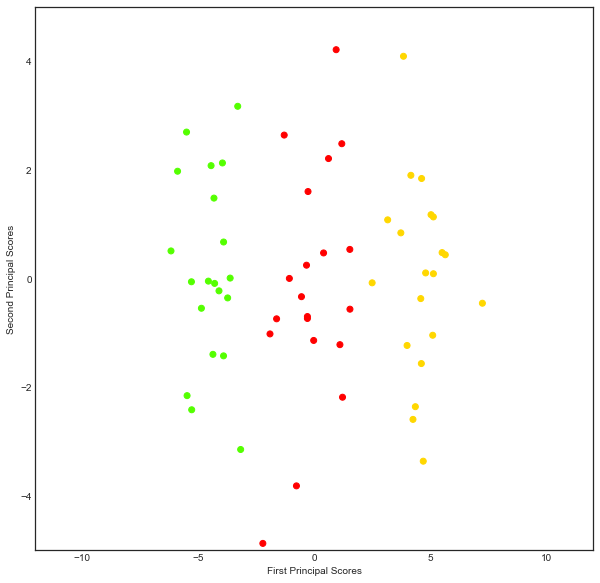

In [340]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-12,12)
ax1.set_ylim(-5,5)

# Plot Principal Components 1 and 2
ax1.scatter(df_plot.iloc[:,0], -df_plot.iloc[:,1], c=label, cmap=plt.cm.prism)

ax1.set_xlabel("First Principal Scores")
ax1.set_ylabel("Second Principal Scores");

## (c)

In [341]:
km1 = KMeans(n_clusters=3, n_init=20)
km1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [342]:
pd.crosstab(label, km1.labels_, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2
True,,,
0,0,1,19
1,20,0,0
2,0,20,0


## (d)

In [343]:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [344]:
pd.Series(km2.labels_).value_counts()

1    32
0    28
dtype: int64

## (e)

In [345]:
km3 = KMeans(n_clusters=4, n_init=20)
km3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [346]:
pd.Series(km3.labels_).value_counts()

1    18
0    18
2    15
3     9
dtype: int64

## (f)

In [347]:
km4 = KMeans(n_clusters=3, n_init=20)
km4.fit(df_plot.iloc[:,:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [348]:
pd.Series(km4.labels_).value_counts()

2    20
1    20
0    20
dtype: int64

Compared to (b)'s one error, (f) has no error..?

## (g)

In [349]:
km5 = KMeans(n_clusters=3, n_init=20)
km5.fit(scale(df))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [350]:
pd.Series(km5.labels_).value_counts()

1    25
0    18
2    17
dtype: int64

This result is much worse than (b)

# 11
## (a)

In [366]:
df = pd.read_csv("../Data/Ch10Ex11.csv", header=None)

## (b)

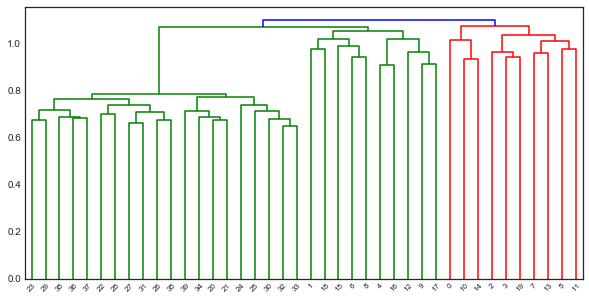

In [382]:
# First Try : Complete
fig, ax = plt.subplots(1,1,figsize=(10,5))
cluster = hierarchy.dendrogram(hierarchy.complete(pdist(df.T, 'correlation')), ax=ax, color_threshold=1.073)

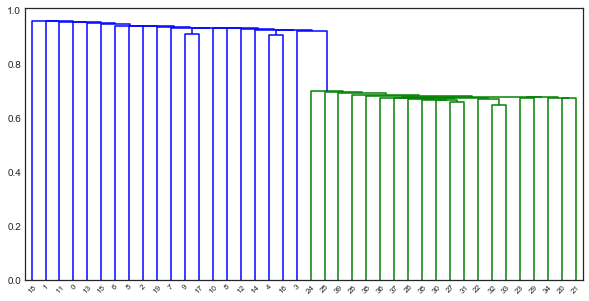

In [384]:
# Second Try : Single
fig, ax = plt.subplots(1,1,figsize=(10,5))
cluster = hierarchy.dendrogram(hierarchy.single(pdist(df.T, 'correlation')), ax=ax, color_threshold=0.8)

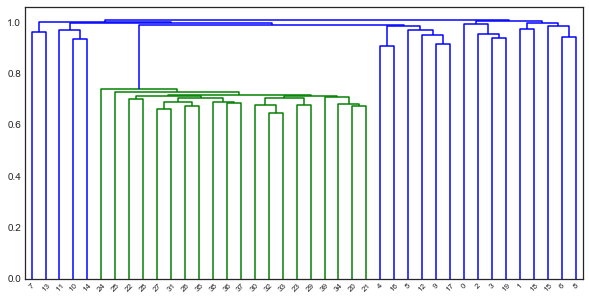

In [396]:
# Third Try : Average
fig, ax = plt.subplots(1,1,figsize=(10,5))
cluster = hierarchy.dendrogram(hierarchy.average(pdist(df.T, 'correlation')), ax=ax, color_threshold=0.8)

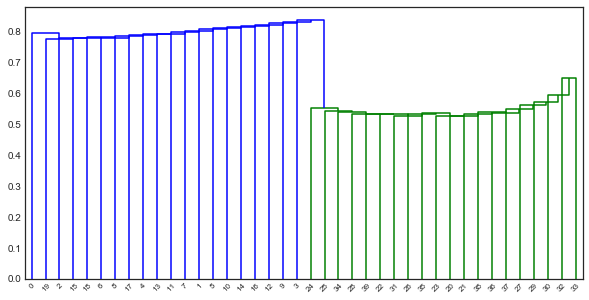

In [388]:
# Fourth Try : Centroid
fig, ax = plt.subplots(1,1,figsize=(10,5))
cluster = hierarchy.dendrogram(hierarchy.centroid(pdist(df.T, 'correlation')), ax=ax, color_threshold=0.7)

## (c)
I don't know how to solve this problem. I will come back to this problem later, maybe.